<a href="https://colab.research.google.com/github/Requenamar3/datawrangling/blob/main/Feature_Importance_DW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the Libraries

#Dataframe and numerical library
import pandas as pd
import numpy as np

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Machine Learming Model
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/churn.csv")
df.sample(5)

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
1003,No,52,no,yes,38,169.3,88,28.78,225.9,97,19.20,172.0,86,7.74,8.2,3,2.21,0
1949,No,73,no,no,0,157.1,109,26.71,268.8,83,22.85,181.5,91,8.17,10.0,8,2.70,0
1468,No,75,no,yes,27,117.5,102,19.98,206.8,127,17.58,194.4,114,8.75,4.2,7,1.13,3
4705,No,140,no,no,0,160.5,123,27.29,185.9,110,15.80,150.4,94,6.77,10.7,5,2.89,1
1305,No,89,no,no,0,141.1,92,23.99,249.1,126,21.17,136.0,73,6.12,10.8,2,2.92,2


In [3]:
print(df.shape)
#count of missing (null) values

df.isnull().sum()

(5000, 18)


churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [4]:
# Fill missing values with 0
df = df.fillna(0)

# Check for missing values in each column after filling
print(df.isnull().sum())

# Print the data types of each column
print(df.dtypes)


churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64
churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                f

In [5]:
#count unique values
df.nunique()

churn                            2
accountlength                  218
internationalplan                2
voicemailplan                    2
numbervmailmessages             48
totaldayminutes               1961
totaldaycalls                  123
totaldaycharge                1961
totaleveminutes               1879
totalevecalls                  126
totalevecharge                1659
totalnightminutes             1853
totalnightcalls                131
totalnightcharge              1028
totalintlminutes               170
totalintlcalls                  21
totalintlcharge                170
numbercustomerservicecalls      10
dtype: int64

In [6]:

# Import the RobustScaler class from the scikit-learn library
from sklearn.preprocessing import RobustScaler

# Create an instance of the RobustScaler
# This scaler removes the median and scales the data according to the Interquartile Range (IQR)
# It is robust to outliers, making it a suitable choice for datasets with outliers
scaler = RobustScaler()

In [7]:
# Define a list of numeric data types
numerics = ['int16', 'int32', 'int64', 'float64']

# Select columns from the DataFrame that are not numeric
# This is done by excluding the data types listed in 'numerics'
# The resulting DataFrame, catDF, will contain only the categorical (non-numeric) columns
catDF = df.select_dtypes(exclude=numerics)

# Select columns from the DataFrame that are numeric
# This is done by including the data types listed in 'numerics'
# The resulting DataFrame, numDF, will contain only the numeric columns
numDF = df.select_dtypes(include=numerics)


In [8]:
# Display the first few rows of the categorical DataFrame
# This is helpful to get a quick look at the data, understand its structure,
# and verify that the DataFrame contains only categorical (non-numeric) data as intended
print(catDF.head())

# Display the first few rows of the numeric DataFrame
# Similar to the above, this allows for a quick inspection of the numeric data
# Ensuring that the DataFrame contains only numeric data as specified by the previous filtering
numDF.head()


  churn internationalplan voicemailplan
0    No                no           yes
1    No                no           yes
2    No                no            no
3    No               yes            no
4    No               yes            no


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
# Scale all numeric columns
# This code snippet applies the RobustScaler scaling to all numeric columns in the numDF DataFrame
# The fit_transform method of the scaler is used to scale the numeric data
# The scaled data is then converted back into a pandas DataFrame
# The columns and index of the original numDF are preserved in the new DataFrame

# Create a new DataFrame from the scaled data
numDF = pd.DataFrame(scaler.fit_transform(numDF.values),
                     columns=numDF.columns,  # Use the original column names
                     index=numDF.index)      # Use the original DataFrame index

# Display the first few rows of the scaled numeric DataFrame
# This allows for a quick inspection of the scaled data
# Ensuring that the scaling operation has been applied as intended
numDF.head()


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


In [10]:
# Drop the target variable 'churn' from the categorical DataFrame (catDF)
# This is a common preprocessing step when you are preparing your features for a machine learning model
# and you need to remove the target variable (or any other variables not used as features)

# The 'drop' method is used to remove the column named 'churn'
# axis=1 specifies that we are dropping a column, not a row
# inplace=True means that the change is made in place and the DataFrame is updated directly,
# so there's no need to assign the result to a new variable

catDF.drop(['churn'], axis=1, inplace=True)


In [11]:
# Converting all the categorical variables to dummy variables
catDF = pd.get_dummies(catDF)
catDF.shape  # Displaying the shape of the DataFrame after converting categorical variables to dummy variables


(5000, 4)

In [12]:
# Displaying the first 2 rows of the DataFrame to inspect the data after converting categorical variables to dummy variables
catDF.head(2)


,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes
0,1,0,0,1
1,1,0,0,1


In [13]:
# Preparing the Y variable
Y = df['churn']

# Tree models may have trouble converting strings to floats, so it's essential to label the target variable as a complete feature matrix.
# Replacing 'No' with 0 and 'Yes' with 1 to convert the target variable to numerical values.
Y = Y.replace(to_replace=['No', 'Yes'], value=[0, 1])

# Displaying the shape of the target variable
print(Y.shape)


(5000,)


In [14]:
# Merging with the original data frame

# Preparing the X variables by concatenating the dummy variables for categorical features with the numerical features.
X = pd.concat([catDF, numDF], axis=1)

# Displaying the shape of the feature matrix
print(X.shape)


(5000, 19)


In [15]:
X.head()

,internationalplan_no,internationalplan_yes,voicemailplan_no,voicemailplan_yes,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,1,0,0,1,0.518519,1.470588,1.172414,0.384615,1.172890,-0.053156,-0.037037,-0.053819,0.653392,-0.346154,0.652459,-0.085714,-0.333333,-0.085106,0.0
1,1,0,0,1,0.129630,1.529412,-0.255172,0.884615,-0.255682,-0.081211,0.111111,-0.081597,0.796460,0.115385,0.796721,0.971429,-0.333333,0.978723,0.0
2,1,0,1,0,0.685185,0.000000,0.873103,0.538462,0.873377,-1.178295,0.370370,-1.178819,-0.557522,0.153846,-0.557377,0.542857,0.333333,0.542553,-1.0
3,0,1,1,0,-0.296296,0.000000,1.645517,-1.115385,1.646104,-2.053894,-0.444444,-2.053819,-0.051622,-0.423077,-0.052459,-1.057143,1.000000,-1.063830,1.0
4,0,1,1,0,-0.462963,0.000000,-0.184828,0.500000,-0.185065,-0.778147,0.814815,-0.777778,-0.199115,0.807692,-0.200000,-0.057143,-0.333333,-0.053191,2.0


In [16]:
# Importing train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Using train_test_split to Split Data into Training and Testing Data


In [18]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest classifier with specified parameters
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators=300).fit(X_train, y_train)

# Extracting feature importances from the trained model
rf.feature_importances_

# Creating a new DataFrame to store feature importances and their corresponding column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# Sorting the features by their importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Printing the feature importances
print(feature_importances)



                       feature  importance
8               totaldaycharge    0.177782
6              totaldayminutes    0.177085
18  numbercustomerservicecalls    0.152554
0         internationalplan_no    0.079028
1        internationalplan_yes    0.073853
16              totalintlcalls    0.049646
11              totalevecharge    0.044475
9              totaleveminutes    0.043055
17             totalintlcharge    0.038929
15            totalintlminutes    0.033845
5          numbervmailmessages    0.024739
3            voicemailplan_yes    0.023939
2             voicemailplan_no    0.023374
12           totalnightminutes    0.014355
14            totalnightcharge    0.013841
7                totaldaycalls    0.009234
4                accountlength    0.007512
10               totalevecalls    0.007043
13             totalnightcalls    0.005709


In [19]:
# Permutation Importance
from sklearn.inspection import permutation_importance

# Computing permutation importance scores
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)

# Creating a DataFrame to store permutation importance statistics
perm = pd.DataFrame(columns=['AVG_Importance', 'STD_Importance'], index=[i for i in X_train.columns])

# Assigning average importance scores to the DataFrame
perm['AVG_Importance'] = r.importances_mean


In [20]:
# Printing the permutation importance statistics DataFrame
print(perm.to_string())


                            AVG_Importance STD_Importance
internationalplan_no                0.0272            NaN
internationalplan_yes               0.0263            NaN
voicemailplan_no                   -0.0007            NaN
voicemailplan_yes                  -0.0009            NaN
accountlength                      -0.0007            NaN
numbervmailmessages                -0.0014            NaN
totaldayminutes                     0.0273            NaN
totaldaycalls                      -0.0005            NaN
totaldaycharge                      0.0279            NaN
totaleveminutes                     0.0038            NaN
totalevecalls                      -0.0016            NaN
totalevecharge                      0.0029            NaN
totalnightminutes                   0.0006            NaN
totalnightcalls                     0.0003            NaN
totalnightcharge                    0.0016            NaN
totalintlminutes                    0.0117            NaN
totalintlcalls

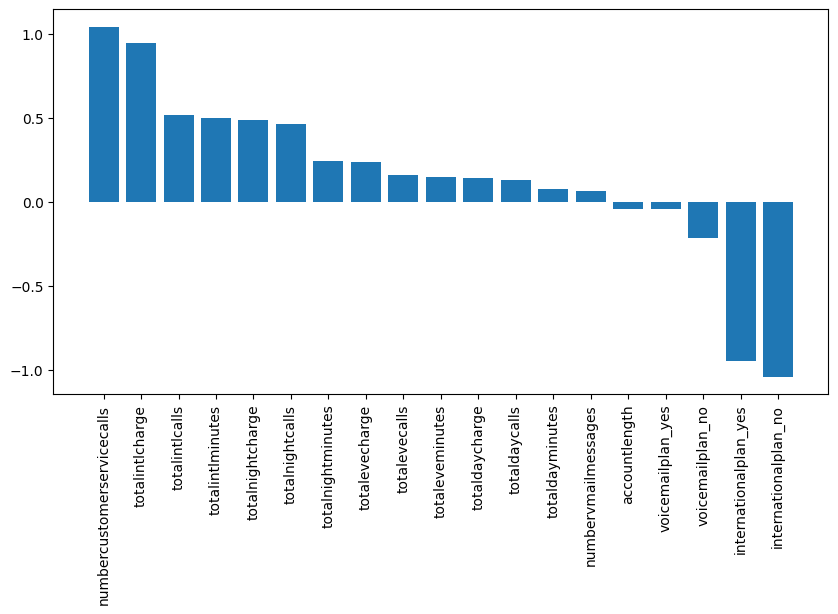

In [21]:
# Initializing and fitting the Logistic Regression model
model = LogisticRegression()
model.fit(X, Y)

# Extracting feature coefficients from the trained model
importance = model.coef_[0]

# Sorting the feature coefficients
importance = np.sort(importance)

# Creating a DataFrame to store feature importances and their corresponding column names
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})

# Sorting the features by their importance in descending order
importance = importance.sort_values('importance', ascending=False)

# Creating a chart to visualize feature importances
plt.figure(figsize=(10, 5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()
